<a href="https://colab.research.google.com/github/dbsxodnjs/Dacon_credit_rating_classification/blob/main/%EB%8C%80%EC%B6%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_EDA_%EB%B0%8F_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
git init

SyntaxError: invalid syntax (<ipython-input-1-f188d5ac1197>, line 1)

In [ ]:
import numpy as np
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [ ]:
# 경고 무시하고 싶을 때
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [ ]:
# # 나눔폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# # !sudo apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

display(train_df.head(3))
display(test_df.head(3))

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0


In [ ]:
train_df.shape

(96294, 15)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [ ]:
train_df.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [ ]:
train_df.dtypes

ID               object
대출금액              int64
대출기간             object
근로기간             object
주택소유상태           object
연간소득              int64
부채_대비_소득_비율     float64
총계좌수              int64
대출목적             object
최근_2년간_연체_횟수      int64
총상환원금             int64
총상환이자           float64
총연체금액           float64
연체계좌수           float64
대출등급             object
dtype: object

인코딩 해줘야할 것 : 대출기간, 근로기간, 주택소유상태, 대출목적, 대출등급
:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [ ]:
for col in train_df[['대출기간', '근로기간', '주택소유상태', '대출목적', '대출등급']].columns: #value count보기

  print(train_df[col].value_counts())

 36 months    64479
 60 months    31815
Name: 대출기간, dtype: int64
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: 근로기간, dtype: int64
MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: 주택소유상태, dtype: int64
부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: 대출목적, dtype: int64
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: 대출등급, dtype: int64


In [ ]:
#test셋 검증

for col in test_df[['대출기간', '근로기간', '주택소유상태', '대출목적']].columns:

  print(test_df[col].value_counts())

 36 months    43229
 60 months    20968
Name: 대출기간, dtype: int64
10+ years    20937
2 years       5609
< 1 year      5143
3 years       5036
1 year        4235
5 years       3927
Unknown       3862
4 years       3662
8 years       3284
9 years       2545
7 years       2515
6 years       2479
10+years       616
<1 year        259
3               49
1 years         39
Name: 근로기간, dtype: int64
MORTGAGE    31739
RENT        25281
OWN          7177
Name: 주택소유상태, dtype: int64
부채 통합     37054
신용 카드     16204
주택 개선      4019
기타         3032
주요 구매      1244
의료          696
소규모 사업      541
자동차         536
이사          362
휴가          294
주택          185
재생 에너지       29
결혼            1
Name: 대출목적, dtype: int64


In [ ]:
train_df.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [ ]:
test_df.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

EDA

Credit rating by Categorical Data


In [ ]:
train_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [ ]:
def credits_level_counts(col):

    unique_list = list(train_df[col].unique())

    for unique in unique_list:

        cond_unique = (train[col]==unique)
        print(unique)
        print(train.loc[cond_unique]['대출등급'].value_counts())
        print()

In [ ]:
train_df['대출등급'].unique()

array(['C', 'B', 'A', 'D', 'F', 'G', 'E'], dtype=object)

In [ ]:
grade = ['C', 'B', 'A', 'D', 'F', 'G', 'E']

grade_ = sorted(grade)

print(grade_)

['A', 'B', 'C', 'D', 'E', 'F', 'G']


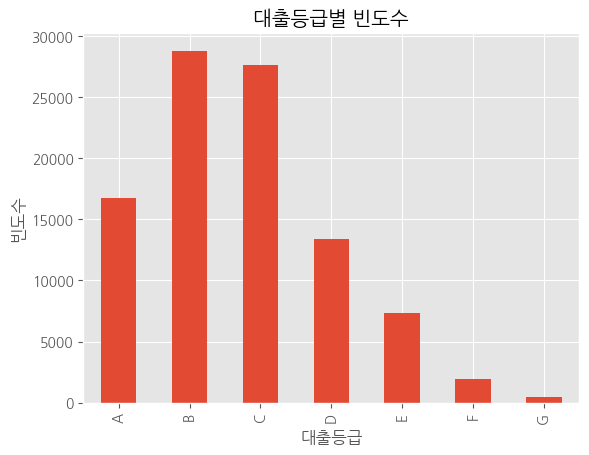

In [ ]:
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 이름 얻어오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rcParams['font.family'] = font_name

#그래프 회색배경으로 만들기
plt.style.use("ggplot")


grade_counts  = train_df.loc[:,:]['대출등급'].value_counts().reindex(grade_)

grade_counts.plot(kind='bar')

# 그래프에 제목 추가
plt.title('대출등급별 빈도수')
# x축 레이블 설정
plt.xlabel('대출등급')
# y축 레이블 설정"
plt.ylabel('빈도수')
# 그래프 표시
plt.show()

In [ ]:
def credits_level_counts(col):

    unique_list = list(train_df[col].unique())

    for unique in unique_list:

        cond_unique = (train_df[col]==unique)
        print(unique)
        print(train_df.loc[cond_unique]['대출등급'].value_counts())
        print()

In [ ]:
hue_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [ ]:
list_cat = ['대출기간', '근로기간', '주택소유상태', '대출목적']

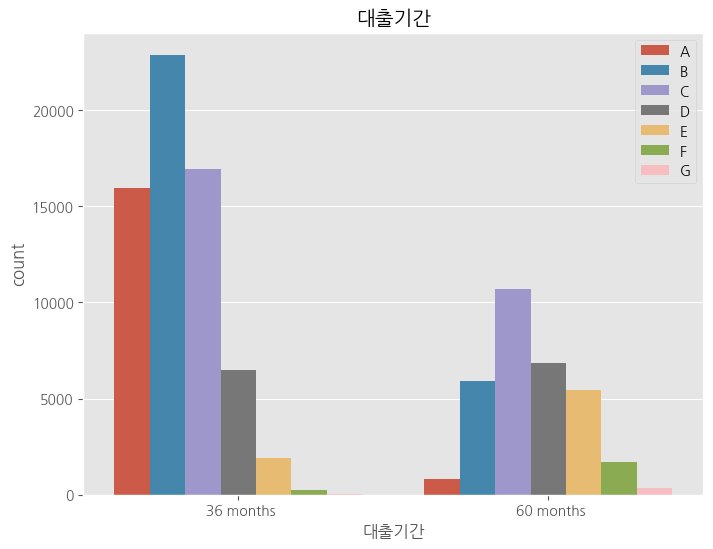


 36 months
B    22883
C    16935
A    15952
D     6485
E     1895
F      270
G       59
Name: 대출등급, dtype: int64

 60 months
C    10688
D     6869
B     5934
E     5459
F     1684
A      820
G      361
Name: 대출등급, dtype: int64



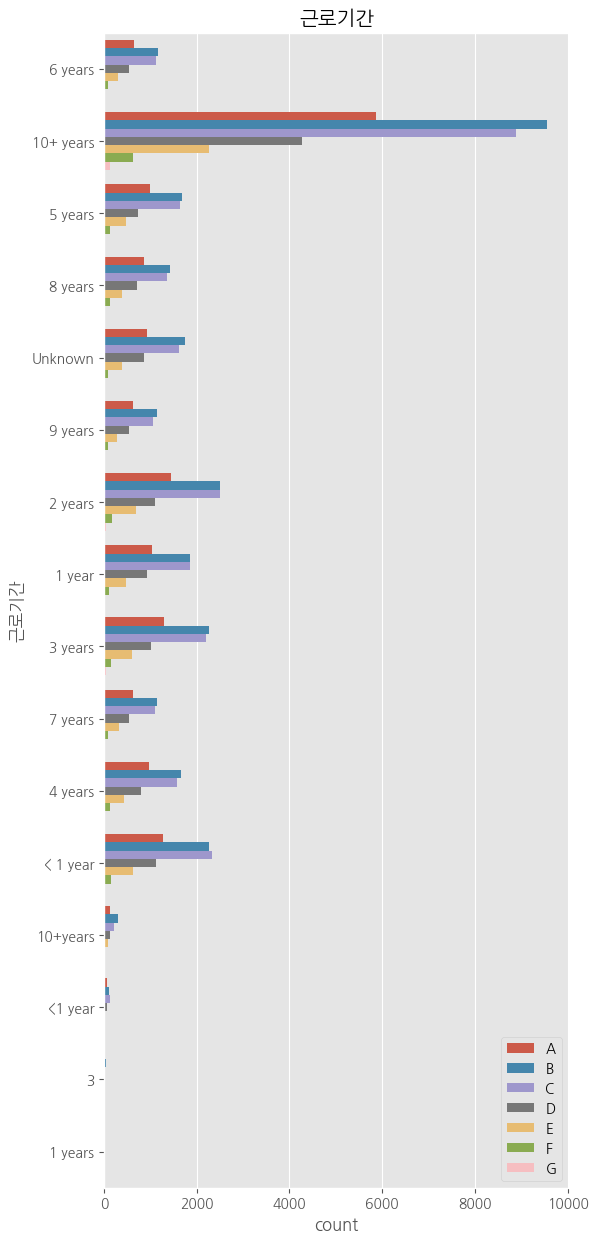


6 years
B    1157
C    1124
A     650
D     543
E     296
F      85
G      19
Name: 대출등급, dtype: int64

10+ years
B    9554
C    8882
A    5872
D    4262
E    2254
F     627
G     134
Name: 대출등급, dtype: int64

5 years
B    1679
C    1646
A     986
D     736
E     475
F     119
G      24
Name: 대출등급, dtype: int64

8 years
B    1417
C    1364
A     867
D     707
E     385
F     128
G      20
Name: 대출등급, dtype: int64

Unknown
B    1742
C    1628
A     934
D     872
E     378
F      92
G      25
Name: 대출등급, dtype: int64

9 years
B    1137
C    1049
A     621
D     545
E     289
F      85
G      18
Name: 대출등급, dtype: int64

2 years
C    2495
B    2493
A    1454
D    1107
E     695
F     170
G      36
Name: 대출등급, dtype: int64

1 year
B    1845
C    1845
A    1025
D     919
E     478
F     109
G      28
Name: 대출등급, dtype: int64

3 years
B    2270
C    2209
A    1295
D    1015
E     604
F     149
G      39
Name: 대출등급, dtype: int64

7 years
B    1138
C    1103
A     619
D     535
E     318
F   

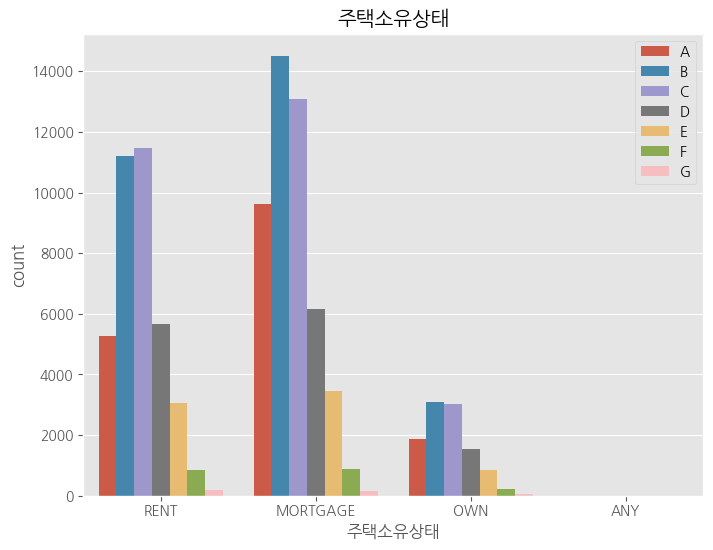


RENT
C    11478
B    11200
D     5653
A     5268
E     3056
F      855
G      195
Name: 대출등급, dtype: int64

MORTGAGE
B    14518
C    13106
A     9640
D     6163
E     3452
F      883
G      172
Name: 대출등급, dtype: int64

OWN
B    3099
C    3038
A    1864
D    1538
E     846
F     216
G      53
Name: 대출등급, dtype: int64

ANY
C    1
Name: 대출등급, dtype: int64



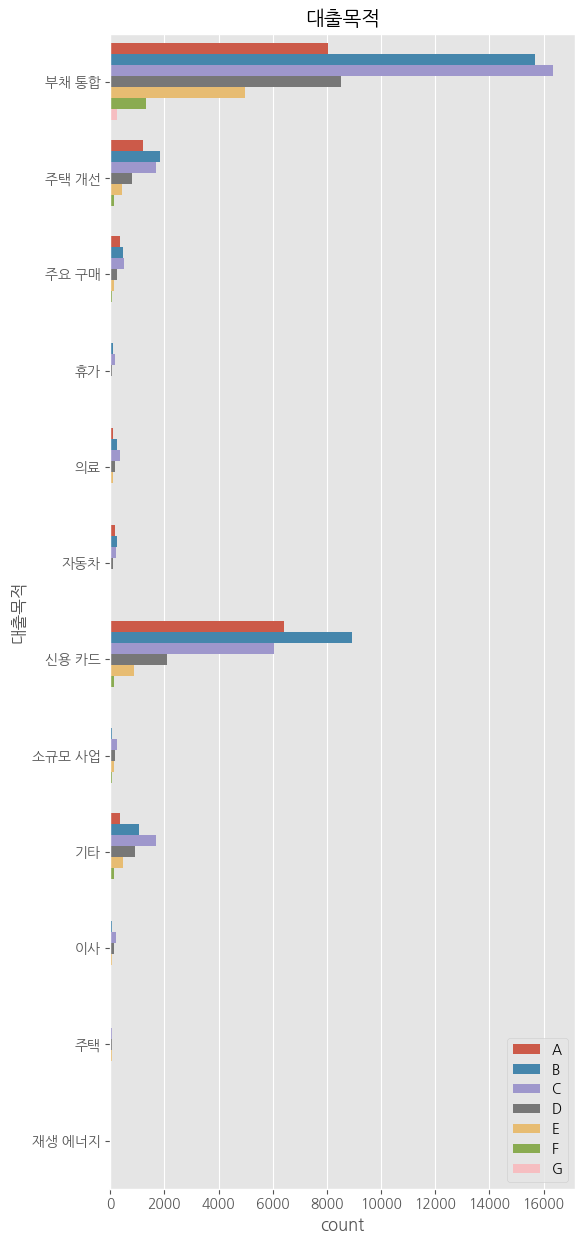


부채 통합
C    16349
B    15680
D     8529
A     8036
E     4979
F     1311
G      266
Name: 대출등급, dtype: int64

주택 개선
B    1845
C    1689
A    1225
D     805
E     425
F     145
G      26
Name: 대출등급, dtype: int64

주요 구매
C    503
B    479
A    372
D    238
E    150
F     53
G      8
Name: 대출등급, dtype: int64

휴가
C    196
B    119
D     78
A     40
E     27
F      4
G      2
Name: 대출등급, dtype: int64

의료
C    375
B    238
D    197
A    104
E     91
F     27
G      7
Name: 대출등급, dtype: int64

자동차
B    258
C    213
A    174
D     87
E     46
F     15
G      4
Name: 대출등급, dtype: int64

신용 카드
B    8917
A    6424
C    6036
D    2092
E     877
F     137
G      17
Name: 대출등급, dtype: int64

소규모 사업
C    249
D    192
E    158
B     75
F     64
G     30
A     19
Name: 대출등급, dtype: int64

기타
C    1705
B    1080
D     916
E     478
A     356
F     147
G      43
Name: 대출등급, dtype: int64

이사
C    203
D    131
B     86
E     50
F     18
A     13
G      5
Name: 대출등급, dtype: int64

주택
C    85
D    68
E    63


In [ ]:
for col in list_cat:

    if col in ['근로기간', '대출목적']:

       plt.figure(figsize=(6,15))
       sns.countplot(data=train_df,y=col, hue='대출등급', hue_order=hue_order)
       plt.title(col)
       plt.legend(loc='lower right')
       plt.show()
       print()
       credits_level_counts(col=col)

    else:

        plt.figure(figsize=(8,6))
        sns.countplot(data=train_df, x=col, hue='대출등급', hue_order=hue_order)
        plt.title(col)
        plt.legend(loc='upper right')
        plt.show()
        print()
        credits_level_counts(col=col)


In [ ]:
list_num = ['연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수',
            '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

In [ ]:
def num_statistic(data, col):
    statistic_df = pd.DataFrame()

    for level in hue_order:
        level_df = data.loc[(data['대출등급']==level)][[col]].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
        level_df.index = [level]

        statistic_df = pd.concat([statistic_df, level_df], axis=0)

    display(statistic_df)
    print()

In [ ]:
test_df['근로기간'].unique()

array(['8 years', '5 years', '6 years', 'Unknown', '10+ years', '3 years',
       '< 1 year', '1 year', '7 years', '4 years', '2 years', '9 years',
       '10+years', '<1 year', '3', '1 years'], dtype=object)

<Axes: xlabel='count', ylabel='주택소유상태'>

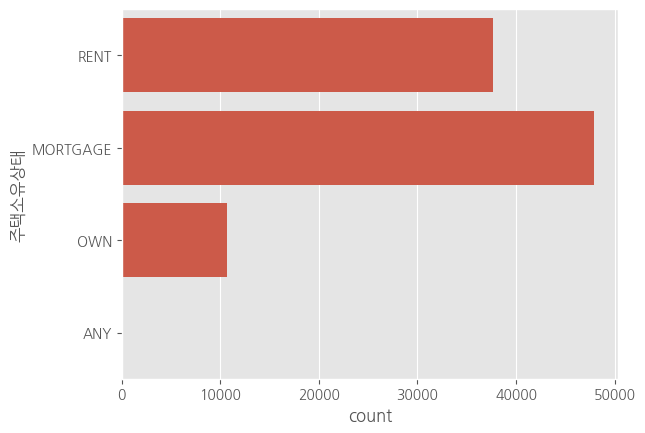

In [ ]:
sns.countplot(y = '주택소유상태',data = train_df)

In [ ]:
train_df['주택소유상태'].value_counts()
#any를 날려도 될 거 같다 test_df엔 없음.

MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: 주택소유상태, dtype: int64

<Axes: xlabel='count', ylabel='대출목적'>

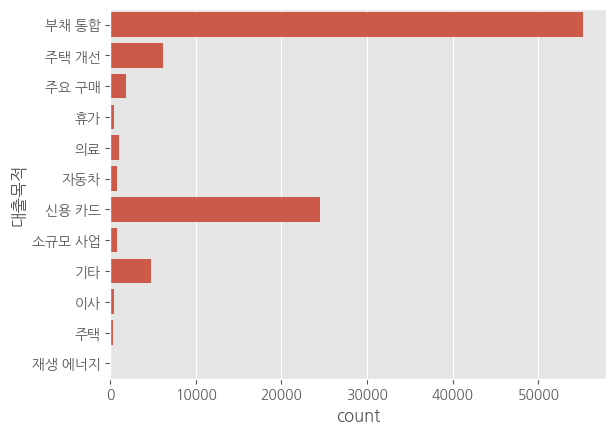

In [ ]:
sns.countplot(y = '대출목적',data = train_df)

In [ ]:
train_df['대출목적'].value_counts()

부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: 대출목적, dtype: int64

<Axes: xlabel='대출목적'>

<Figure size 5000x5000 with 0 Axes>

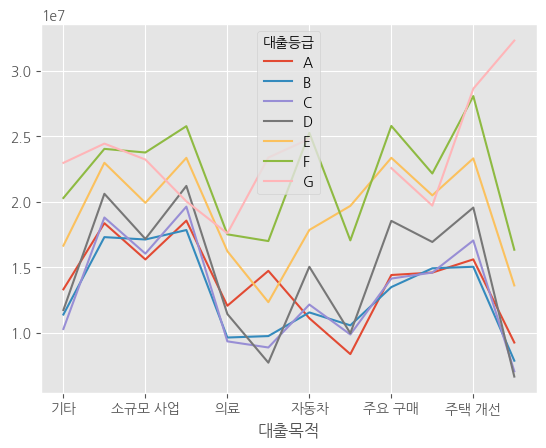

In [ ]:
purpose_pivot = pd.pivot_table(train_df
                               , index = '대출목적'
                               , columns = '대출등급'
                               , values = '대출금액'
                               , aggfunc = 'mean')

plt.figure(figsize= (50,50))
purpose_pivot.plot()

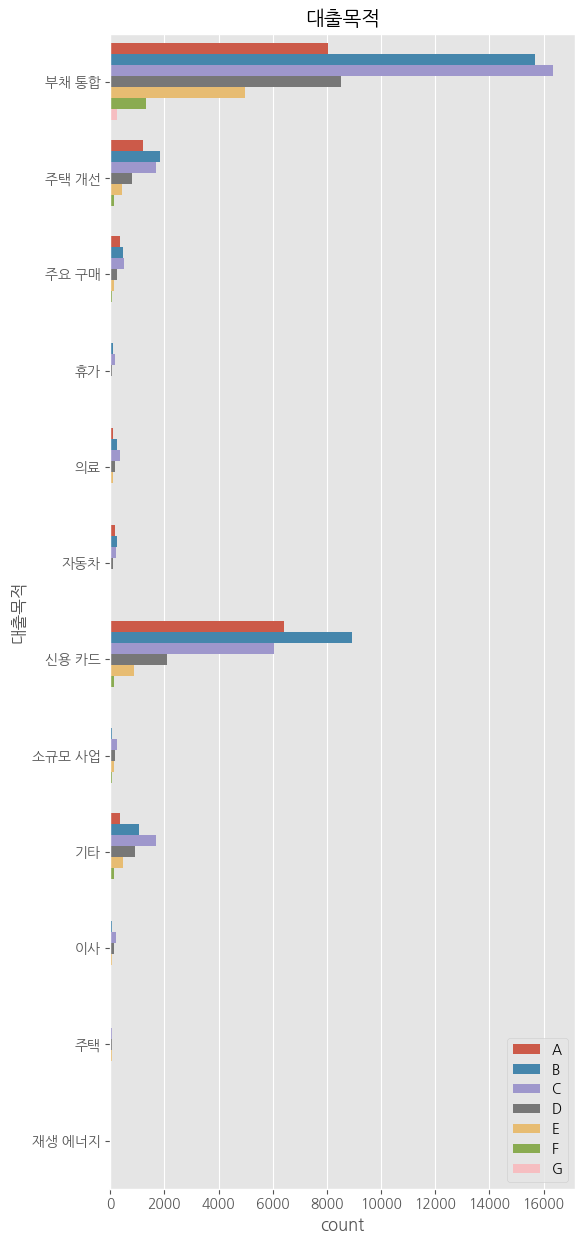


부채 통합
C    16349
B    15680
D     8529
A     8036
E     4979
F     1311
G      266
Name: 대출등급, dtype: int64

주택 개선
B    1845
C    1689
A    1225
D     805
E     425
F     145
G      26
Name: 대출등급, dtype: int64

주요 구매
C    503
B    479
A    372
D    238
E    150
F     53
G      8
Name: 대출등급, dtype: int64

휴가
C    196
B    119
D     78
A     40
E     27
F      4
G      2
Name: 대출등급, dtype: int64

의료
C    375
B    238
D    197
A    104
E     91
F     27
G      7
Name: 대출등급, dtype: int64

자동차
B    258
C    213
A    174
D     87
E     46
F     15
G      4
Name: 대출등급, dtype: int64

신용 카드
B    8917
A    6424
C    6036
D    2092
E     877
F     137
G      17
Name: 대출등급, dtype: int64

소규모 사업
C    249
D    192
E    158
B     75
F     64
G     30
A     19
Name: 대출등급, dtype: int64

기타
C    1705
B    1080
D     916
E     478
A     356
F     147
G      43
Name: 대출등급, dtype: int64

이사
C    203
D    131
B     86
E     50
F     18
A     13
G      5
Name: 대출등급, dtype: int64

주택
C    85
D    68
E    63


In [ ]:
#대출목적 보기
plt.figure(figsize=(6,15))
sns.countplot(data=train_df,y='대출목적', hue='대출등급', hue_order=hue_order)
plt.title('대출목적')
plt.legend(loc='lower right')
plt.show()
print()
credits_level_counts(col='대출목적')

<Axes: xlabel='count', ylabel='최근_2년간_연체_횟수'>

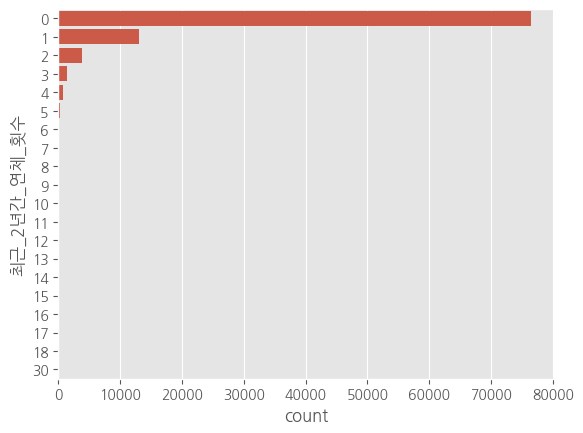

In [ ]:
sns.countplot(y = '최근_2년간_연체_횟수',data = train_df)

In [ ]:
train_df['최근_2년간_연체_횟수'].value_counts()

0.0     54669
1.0      9390
2.0      2807
3.0      1019
4.0       471
5.0       234
6.0       136
7.0        63
8.0        52
9.0        29
10.0       24
11.0       15
12.0        7
14.0        6
13.0        5
16.0        3
18.0        1
17.0        1
30.0        1
15.0        1
Name: 최근_2년간_연체_횟수, dtype: int64

In [ ]:
train_df['연체여부'] =(train_df['총연체금액'] > 0).astype(int)

train_df.head()


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,연체여부
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,0
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,0
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,0
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0


In [ ]:
train_df.연체여부.value_counts()

0    96113
1      181
Name: 연체여부, dtype: int64

<Axes: xlabel='count', ylabel='연체여부'>

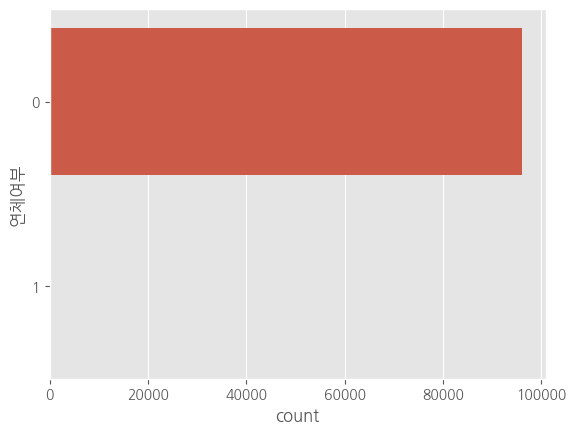

In [ ]:
sns.countplot(y = '연체여부',data = train_df)

<Axes: xlabel='대출등급', ylabel='연체여부'>

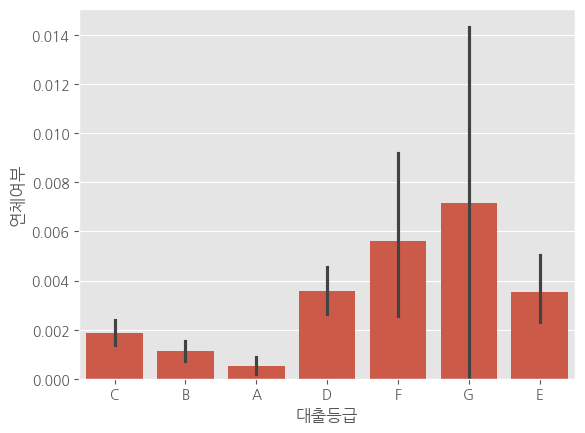

In [ ]:
pp = train_df[['연체여부','대출등급']]


sns.barplot(x='대출등급', y='연체여부', data=pp)

# ***근로기간 전처리 및 any 날리기***

중복되는 값 통일화 시키기


In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

display(train_df.head(3))
display(test_df.head(3))

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0


In [ ]:
train_df = train_df[train_df.주택소유상태 != 'ANY']

In [ ]:
train_df['근로기간'].unique()


array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year',
       '10+years', '<1 year', '3', '1 years'], dtype=object)

In [ ]:
test_df['근로기간'].unique()

array(['8 years', '5 years', '6 years', 'Unknown', '10+ years', '3 years',
       '< 1 year', '1 year', '7 years', '4 years', '2 years', '9 years',
       '10+years', '<1 year', '3', '1 years'], dtype=object)

In [ ]:
def encode_work_duration(value): # 근로기간 전처리
  if value in ['10+ years','10+years']:
    return 10
  elif value in ['1 year', '1 years']:
    return 1
  elif value in ['<1 year','< 1 year' ]:
    return 1
  elif value in ['2 years']:
    return 2
  elif value in ['3']:
    return 3
  elif value in ['4 years']:
    return 4
  elif value in ['5 years']:
    return 5
  elif value in ['6 years']:
    return 6
  elif value in ['7 years']:
    return 7
  elif value in ['8 years']:
    return 8
  elif value in ['9 years']:
    return 9
  elif value == 'Unknown':
    return -1
  else:
    return None

In [ ]:
train_df['근로기간'] = train_df['근로기간'].apply(encode_work_duration)
test_df['근로기간'] =  test_df['근로기간'].apply(encode_work_duration)
print(test_df['근로기간'].value_counts())
print(test_df['근로기간'].info())

 10.0    21553
 1.0      9676
 2.0      5609
 5.0      3927
-1.0      3862
 4.0      3662
 8.0      3284
 9.0      2545
 7.0      2515
 6.0      2479
 3.0        49
Name: 근로기간, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 64197 entries, 0 to 64196
Series name: 근로기간
Non-Null Count  Dtype  
--------------  -----  
59161 non-null  float64
dtypes: float64(1)
memory usage: 501.7 KB
None


# **대출기간 전처리**

In [ ]:
for col in train_df.columns:
  if train_df[col].dtype == 'object':
    train_df[col] = train_df[col].str.strip()
for col in test_df.columns:
  if test_df[col].dtype == 'object':
    test_df[col] = test_df[col].str.strip()

In [ ]:
train_df['대출기간'].value_counts()

36 months    64478
60 months    31815
Name: 대출기간, dtype: int64

In [ ]:
test_df['대출기간'].value_counts()

36 months    43229
60 months    20968
Name: 대출기간, dtype: int64

In [ ]:
train_df['대출기간'] = train_df['대출기간'].replace({'36 months': 36 , '60 months': 60})
test_df['대출기간'] = test_df['대출기간'].replace({'36 months': 36 , '60 months': 60})

print(test_df['대출기간'].info())
print(test_df['대출기간'].value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 64197 entries, 0 to 64196
Series name: 대출기간
Non-Null Count  Dtype
--------------  -----
64197 non-null  int64
dtypes: int64(1)
memory usage: 501.7 KB
None
36    43229
60    20968
Name: 대출기간, dtype: int64


In [ ]:
print(test_df['대출기간'].info())
print(test_df['대출기간'].value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 64197 entries, 0 to 64196
Series name: 대출기간
Non-Null Count  Dtype
--------------  -----
64197 non-null  int64
dtypes: int64(1)
memory usage: 501.7 KB
None
36    43229
60    20968
Name: 대출기간, dtype: int64


In [ ]:
train_df.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


# 대출 등급 설정
class_mapping = {6: 'A', 5:'B',4:'C', 3:'D', 2:'E', 1:'F', 0:'G'}



In [ ]:
# 대출 등급 매핑 딕셔너리
class_mapping = {'A': 6, 'B': 5, 'C': 4 ,  'D': 3, 'E': 2, 'F': 1 , 'G': 0 }

# 'Loan_Grade' 열의 값 변환
train_df['대출등급'] = train_df['대출등급'].map(class_mapping)

# 결과 출력


# 주택 소유상태 원핫 인코딩

In [ ]:
home = pd.get_dummies(train_df['주택소유상태'])
home_t = pd.get_dummies(test_df['주택소유상태'])

In [ ]:
train_df = train_df.drop(['주택소유상태'], axis=1)
test_df = test_df.drop(['주택소유상태'], axis = 1)


In [ ]:
train_df = pd.concat([train_df,home],axis=1)
test_df = pd.concat([test_df,home_t],axis=1)
test_df.head(2)

,ID,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,MORTGAGE,OWN,RENT
0,TEST_00000,16800000,36,8.0,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0,1,0,0
1,TEST_00001,8400000,36,5.0,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0,0,0,1


In [ ]:
# # 대출 목적

# purpose = pd.get_dummies(train_df['대출목적'])

# purpose_t = pd.get_dummies(test_df['대출목적'])

In [ ]:
train_df['Loan_concate'] = train_df['대출목적'].apply(lambda x :1 if x=='부채 통합' else 0)
train_df['credit_card'] = train_df['대출목적'].apply(lambda x :1 if x=='신용 카드' else 0)
train_df['house_etc'] = train_df['대출목적'].apply(lambda x :1 if x=='주택 개선' or '이사' or '주택' or '자동차' else 0)
train_df['consume'] = train_df['대출목적'].apply(lambda x :1 if x== '주요 구매' or '자동차'else 0)
train_df['business'] = train_df['대출목적'].apply(lambda x :1 if x=='소규모 사업' or '재생 에너지' else 0)
train_df['etc'] = train_df['대출목적'].apply(lambda x :1 if x=='기타' or '결혼' or '휴가'  else 0)

test_df['Loan_concate'] = test_df['대출목적'].apply(lambda x :1 if x=='부채 통합' else 0)
test_df['credit_card'] = test_df['대출목적'].apply(lambda x :1 if x=='신용 카드' else 0)
test_df['house_etc'] = test_df['대출목적'].apply(lambda x :1 if x=='주택 개선' or '이사' or '주택' or '자동차' else 0)
test_df['consume'] = test_df['대출목적'].apply(lambda x :1 if x== '주요 구매' or '자동차'else 0)
test_df['business'] = test_df['대출목적'].apply(lambda x :1 if x=='소규모 사업' or '재생 에너지' else 0)
test_df['etc'] = test_df['대출목적'].apply(lambda x :1 if x=='기타' or '결혼' or '휴가'  else 0)


In [ ]:
# train_df = train_df.drop(['대출목적'], axis=1)
# train_df = pd.concat([train_df,purpose],axis=1)
train_df.head(2)



,ID,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,...,대출등급,MORTGAGE,OWN,RENT,Loan_concate,credit_card,house_etc,consume,business,etc
0,TRAIN_00000,12480000,36,6.0,72000000,18.90,15,부채 통합,0,0,...,4,0,0,1,1,0,1,1,1,1
1,TRAIN_00001,14400000,60,10.0,130800000,22.33,21,주택 개선,0,373572,...,5,1,0,0,0,0,1,1,1,1


In [ ]:
# test_df = test_df.drop(['대출목적'], axis=1)
# test_df = pd.concat([test_df,purpose_t],axis=1)
# test_df.head(2)

,ID,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,...,소규모 사업,신용 카드,의료,이사,자동차,재생 에너지,주요 구매,주택,주택 개선,휴가
0,TEST_00000,16800000,36,8.0,132000000,19.64,12,0,394692,146604.0,...,0,0,0,0,0,0,0,0,1,0
1,TEST_00001,8400000,36,5.0,89971200,15.84,25,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


# 테스트셋 분류

In [ ]:
# train = train_df.copy()
# test = test_df.copy()

# train_df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급', 'MORTGAGE',
       'OWN', 'RENT', '기타', '부채 통합', '소규모 사업', '신용 카드', '의료', '이사', '자동차',
       '재생 에너지', '주요 구매', '주택', '주택 개선', '휴가'],
      dtype='object')

In [ ]:
train_x = train.drop(columns=['ID', '근로기간', '대출등급'])
train_y = train['대출등급']


In [ ]:
# from sklearn.model_selection import train_test_split



# X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.25, random_state=321)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# categorical_features = ['대출목적']

# for i in categorical_features:
#     le = LabelEncoder()
#     le=le.fit(X_train[i])
#     X_train[i]=le.transform(X_train[i])

#     for case in np.unique(X_test[i]):
#         if case not in le.classes_:
#             le.classes_ = np.append(le.classes_, case)
#     X_test[i]=le.transform(X_test[i])

# display(X_train.head(3))
# display(X_test.head(3))

## 머신돌리기

In [ ]:
from xgboost import XGBClassifier
import timeit

In [ ]:
model = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=4, random_state = 32)


# 모델 학습
model.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
test_x = test_df.drop(columns=['ID', '근로기간'])

In [ ]:
y_pred = model.predict(test_x)

ValueError: feature_names mismatch: ['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', 'MORTGAGE', 'OWN', 'RENT', '기타', '부채 통합', '소규모 사업', '신용 카드', '의료', '이사', '자동차', '재생 에너지', '주요 구매', '주택', '주택 개선', '휴가'] ['대출금액', '대출기간', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', 'MORTGAGE', 'OWN', 'RENT', '결혼', '기타', '부채 통합', '소규모 사업', '신용 카드', '의료', '이사', '자동차', '재생 에너지', '주요 구매', '주택', '주택 개선', '휴가']
training data did not have the following fields: 결혼

In [ ]:
#정확도 평가
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, Y_test)

0.8409487413807427

In [ ]:
importances = model.feature_importances_
t = pd.Series(importances, index=X_train.columns).sort_values()
t

연체여부            0.000000
연체계좌수           0.006634
MORTGAGE        0.006843
OWN             0.007586
재생 에너지          0.007699
총연체금액           0.007879
주요 구매           0.008500
휴가              0.008834
이사              0.009872
주택              0.010714
총계좌수            0.011062
자동차             0.011239
부채 통합           0.011339
의료              0.011865
주택 개선           0.012627
부채_대비_소득_비율     0.018134
소규모 사업          0.019661
최근_2년간_연체_횟수    0.021564
기타              0.029336
RENT            0.032983
연간소득            0.035345
대출금액            0.042028
신용 카드           0.111838
총상환원금           0.151854
총상환이자           0.168147
대출기간            0.236420
dtype: float32

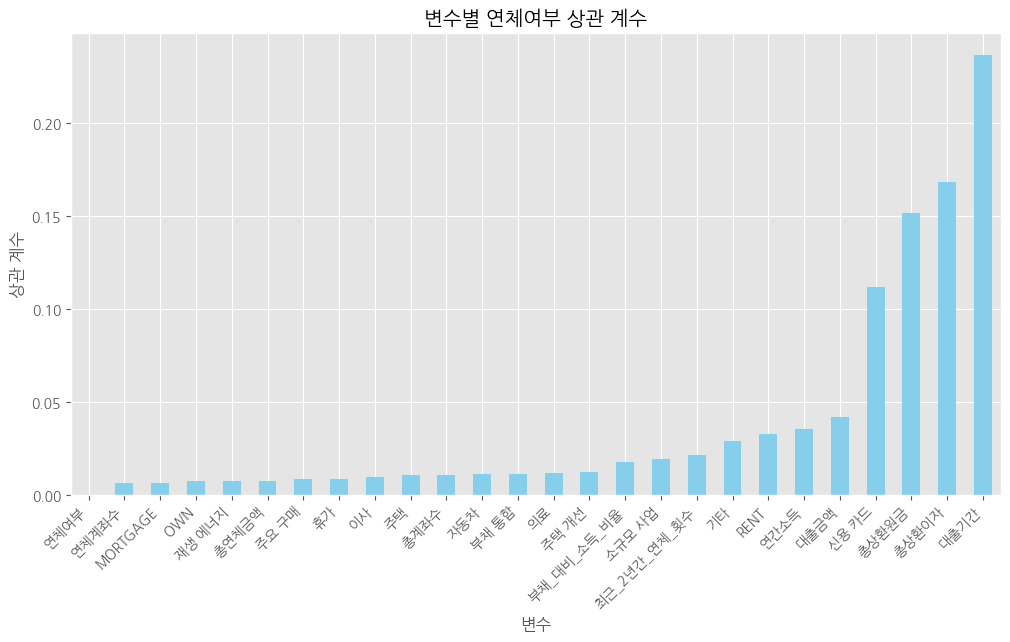

In [ ]:
# 상관 계수 데이터프레임 생성
correlation_df = pd.Series(t)

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))
correlation_df.sort_values().plot(kind='bar', color='skyblue')
plt.title("변수별 연체여부 상관 계수")
plt.xlabel("변수")
plt.ylabel("상관 계수")
plt.xticks(rotation=45, ha='right')
plt.show()